# Simulation of Feedback with Chaotic Dynamics from a Kawasaki Ising Model

In [8]:
import numpy as np
import random
from fractions import Fraction
from Commands import dec2int, bernoulli, control, order_parameter
from MonteCarloCommands import energy, boltzmann_probability
import matplotlib.pyplot as plt




## Initialization of Parameters

In [9]:

length = 100
random.seed(10)
times = 5
low_prob = 00
high_prob = 100 + 1
Beta = 1
K = -1 
num_chains = 2
spacing = 10
num_points = int(np.ceil((high_prob-low_prob)/spacing))



## Initialization of Order Parameter Arrays

In [10]:
if (length**2//2) % 10 == 0:
#record = np.zeros([high_prob-low_prob, 1], dtype=float)
    time_size = (length**2)//200+1 # number of data points along the time axis

    record1 = np.zeros([num_points, time_size], dtype=float) #[probability, time]
    record2 = np.zeros([num_points, time_size], dtype=float)
    recordferro = np.zeros([num_points,time_size], dtype=float) # set up for ferromagnetic order parameter
    #record3 = np.zeros([high_prob-low_prob, 1], dtype=float)
    recordlong = np.zeros((num_points, length, time_size), dtype=float) #[probability, position, time]
    staggeredMagnetization = np.zeros((num_points,time_size), dtype=float)
    totalparam = np.zeros((num_points,time_size))
    
else: 
    time_size = (length**2)//200+2 # number of data points along the time axis

    record1 = np.zeros([num_points, time_size], dtype=float) #[probability, time]
    record2 = np.zeros([num_points, time_size], dtype=float)
    recordferro = np.zeros([num_points,time_size], dtype=float) # set up for ferromagnetic order parameter
    #record3 = np.zeros([high_prob-low_prob, 1], dtype=float)
    recordlong = np.zeros((num_points, length, time_size), dtype=float)
    staggeredMagnetization = np.zeros((num_points,time_size), dtype=float)
    totalparam = np.zeros((num_points,time_size))
    

## Control + Kawasaki

In [11]:

for k in range(0, times):
    j = 0
    print(k)
    # Probability of choosing the Control Map
    for prob in range(low_prob, high_prob, spacing):
        #print(prob)
        #number1 = random.random()
        #number2 = random.random()
        #number3 = random.random()
        #number = tests[k]
        rep1 = random.getrandbits(length)
        rep2 = random.getrandbits(length)
        #rep3 = dec2int(number3, length)
        #print(k, rep, dec2int(Fraction(2, 3), length), dec2int(Fraction(1, 3), length))
        for i in range((length**2)//2):
            if random.random() > (float(prob) / 100):
                rep1 = bernoulli(rep1, length)
            else:
                rep1 = control(rep1, length)
            if random.random() > (float(prob)/100):
                rep2 = bernoulli(rep2, length)
            else:
                rep2 = control(rep2, length)
            #if random.random() > (float(prob)/100):
            #    rep3 = bernoulli(rep3, length)
            #else:
            #    rep3 = control(rep3, length)
            if (i%100)==0 and i !=0:
                record1[j, i//100] += order_parameter(rep1, length)/times
                record2[j, i//100] += order_parameter(rep2, length)/times
                recordferro[j, i//100] += (lattice[0].count('1')+lattice[1].count('1')-lattice[0].count('0')-lattice[1].count('0'))/(2*length)/times
                #record3[j] += order_parameter(rep3, length)/times
                for y in range(length):
                    for x in range(num_chains):
                        staggeredMagnetization[j, i//100] += (-1)**(x+y+~int(lattice[x][y]))/(2*length*times)
                for place in range(length):
                    recordlong[j,place, i//100] = order_parameter(int(lattice[0][length-1-place] +lattice[1][length-1-place] 
                                    , base=2),2)

            # Initializing Ising Array for Monte Carlo Simulation
            lattice = [format(rep1, '0'+str(length)+'b'), format(rep2, '0'+str(length)+'b')]
                       #format(rep3, '0'+str(length)+'b')]
            for repeat in range(1):
                for y_pos in range(0, length): # this section takes about 1/100 s at length = 100, accounts for most of the run time
                    for x_pos in range(0, num_chains):
                        E_i = energy(x_pos, y_pos, lattice, num_chains, length, K, True)
                        old = lattice[x_pos]
                        # noinspection PyTypeChecker
                        lattice[x_pos] = format(int(lattice[x_pos], base=2) ^ (1 << (length - y_pos - 1)), '0' + str(length) + 'b')
                        E_f = energy(x_pos, y_pos, lattice, num_chains, length, K, True)
                        if random.random() <= boltzmann_probability(E_i, E_f, Beta):
                            pass
                        else:
                            lattice[x_pos] = old
            

            
            rep1 = int(lattice[0], base=2)
            rep2 = int(lattice[1], base=2)
            #rep3 = int(lattice[2], base=2)
        #record[j] += (order_parameter(rep1, length)+order_parameter(rep2,length)+order_parameter(rep3, length))/(3*times) # can get rid of. just average the other three records in a plot
        record1[j, -1] += order_parameter(rep1, length)/times
        record2[j, -1] += order_parameter(rep2, length)/times
        recordferro[j, -1] += (lattice[0].count('1')+lattice[1].count('1')-lattice[0].count('0')-lattice[1].count('0'))/(2*length)/times
        #record3[j] += order_parameter(rep3, length)/times
        for y in range(length):
            for x in range(num_chains):
                staggeredMagnetization[j, -1] += (-1)**(x+y+~int(lattice[x][y]))/(2*length*times)
        staggeredMagnetization = np.abs(staggeredMagnetization) # accounts for changes of sign between iterations
        if prob == high_prob-1: 
            print(lattice)
            print(staggeredMagnetization[-1])
        for place in range(length):
            recordlong[j,place, -1] = order_parameter(int(lattice[0][length-1-place] +lattice[1][length-1-place] 
                              , base=2),2)
        j += 1
        #print(j, number, rep, record[j])
        


0
['0100101001111111000001111001111111100011000000001011111001111111100111010111110000000000001111100000', '0000011101111110000011111001111111100011000000000001111001110111100000010101110000000000011111100000']
[0.    0.018 0.022 0.004 0.012 0.018 0.022 0.036 0.024 0.012 0.042 0.008
 0.    0.048 0.014 0.012 0.016 0.016 0.004 0.008 0.006 0.014 0.016 0.016
 0.018 0.022 0.01  0.02  0.016 0.002 0.036 0.014 0.006 0.008 0.01  0.022
 0.014 0.014 0.008 0.016 0.016 0.022 0.026 0.006 0.01  0.01  0.028 0.018
 0.02  0.    0.008]
1
['0000000000011000000000100011011000000011111111111110001111111000000001111000000001111111111011010000', '0000000000011000000000100011111000000011111111111110011111111000000001111000000000111111111010000000']
[0.    0.03  0.04  0.012 0.02  0.03  0.042 0.062 0.016 0.008 0.042 0.022
 0.024 0.034 0.008 0.002 0.004 0.006 0.032 0.    0.02  0.03  0.008 0.016
 0.004 0.014 0.008 0.002 0.004 0.038 0.05  0.004 0.01  0.018 0.048 0.012
 0.008 0.056 0.026 0.034 0.01  0.044 0.052 0.02

In [12]:

#print( record1/3,  record2/3 , np.ndarray(np.sum(recordlong, axis=1)/(length*3)))
for i in range(num_points):
    for tau in range(time_size):
        totalparam[i, tau] = record1[i, tau]/3+record2[i, tau]/3 +np.sum(recordlong, axis=1)[i, tau]/(length*3)

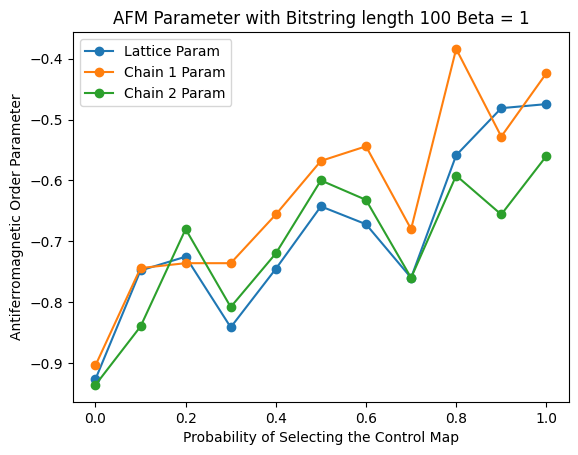

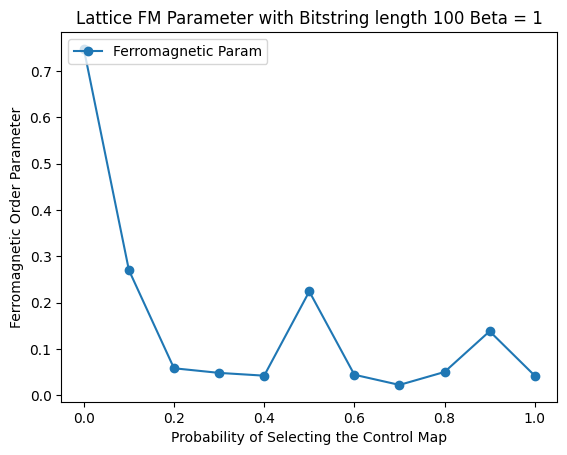

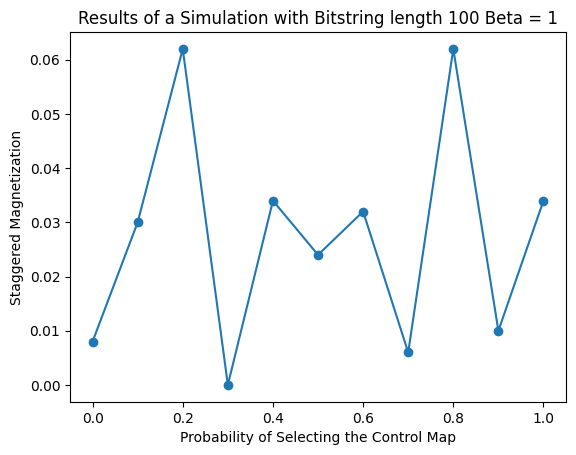

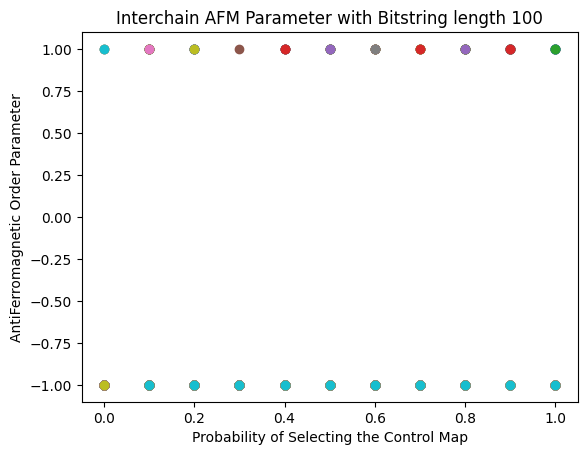

['1111111100011011111100010100000111110101010000110111000101010101011101010010000001110000010000001101', '1111111001111111101110000000000011111111111001111111000000001111111111111000000000110100000000001101']
3021804816334293375069176832
[ 0.     0.296  0.264  0.368  0.264  0.304  0.312  0.216  0.224  0.152
  0.136  0.2    0.248  0.184  0.152  0.24   0.224  0.152  0.224  0.248
  0.232  0.272  0.256  0.384  0.256  0.24   0.176  0.296  0.288  0.216
  0.312  0.136  0.328  0.208  0.368  0.264  0.144  0.192  0.224  0.328
  0.216  0.192  0.112  0.28   0.312  0.184  0.232  0.28   0.216  0.216
 -0.424] [ 0.     0.4    0.392  0.4    0.32   0.328  0.416  0.44   0.392  0.464
  0.32   0.36   0.32   0.392  0.4    0.312  0.36   0.376  0.384  0.344
  0.296  0.456  0.344  0.456  0.344  0.448  0.432  0.352  0.4    0.376
  0.336  0.376  0.424  0.352  0.464  0.384  0.456  0.488  0.376  0.336
  0.312  0.296  0.328  0.4    0.384  0.392  0.4    0.408  0.368  0.456
 -0.56 ]


In [80]:
plt.rcParams.update({
    "text.usetex": False,
})
#print(record[99])

fig, ax = plt.subplots() # results at end of simulation
ax.plot( np.linspace(0,1,num_points), totalparam[:,-1], marker='o', label="Lattice Param")

ax.plot( np.linspace(0,1,num_points), record1[:,-1], marker='o', label= "Chain 1 Param")
ax.plot( np.linspace(0,1,num_points), record2[:,-1], marker='o', label= "Chain 2 Param")

#Below creates two lines crossing at (.5,.5)
#plt.axvline(.5)
#plt.axhline(.5)

plt.legend(loc='upper left')
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'Antiferromagnetic Order Parameter')
ax.set_title(r'AFM Parameter with Bitstring length '+str(length) +' Beta = ' +str(Beta))

fig, ax = plt.subplots() # results at end of simulation
ax.plot( np.linspace(0,1,num_points), np.abs(recordferro[:,-1]), marker='o', label= "Ferromagnetic Param")
plt.legend(loc='upper left')
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'Ferromagnetic Order Parameter')
ax.set_title(r'Lattice FM Parameter with Bitstring length '+str(length) +' Beta = ' +str(Beta))

fig, ax = plt.subplots() # results at end of simulation
ax.plot(np.linspace(0,1,num_points), np.abs(staggeredMagnetization[:,-1]), marker='o', label = "Staggered Magnetization")
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'Staggered Magnetization')
ax.set_title(r'Results of a Simulation with Bitstring length '+str(length) +' Beta = ' +str(Beta))

fig, ax = plt.subplots()
for p in range(length):
    ax.scatter( np.linspace(0,1,num_points), recordlong[:, p, -1], marker='o', label="Param Row =" + str(p))

ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'AntiFerromagnetic Order Parameter')
ax.set_title(r'Interchain AFM Parameter with Bitstring length '+str(length))
#fig.save("200 Length BitString, Full Probability Spectrum")
#plt.show()
#fig, ax = plt.subplots()
#ax.plot( np.linspace(.3,.6,30), record1[30:60], marker='o')
#ax.set_xlabel(r'Probability of Selecting the Control Map')
#ax.set_ylabel(r'$ <\hat{O}>$')
#ax.set_title(r'Results of a Simulation with Bitstring length '+str(length))
#fig.save("200 Length BitString, Full Probability Spectrum")
plt.show()
print(lattice)
print(int(lattice[0], base = 2)-int(lattice[1], base = 2))
print(record1[-1],  record2[-1])

C:\Users\Joshua\AppData\Local\Temp\ipykernel_187108\4037680232.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left', prop={'size':8})


Text(0.5, 1.0, 'Interchain AFM Parameter with Bitstring length 100')

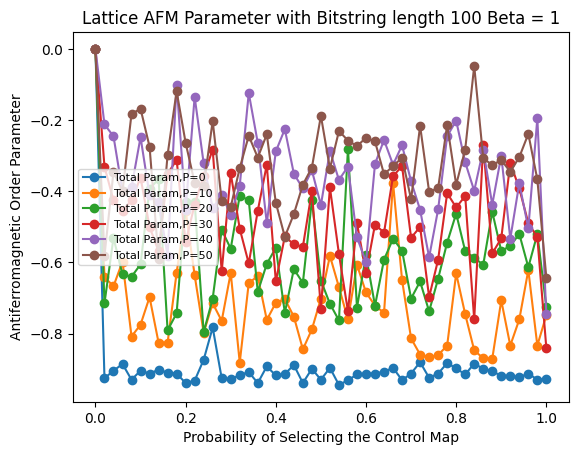

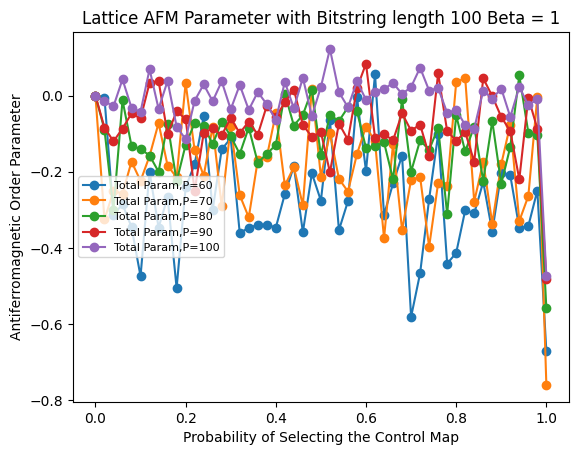

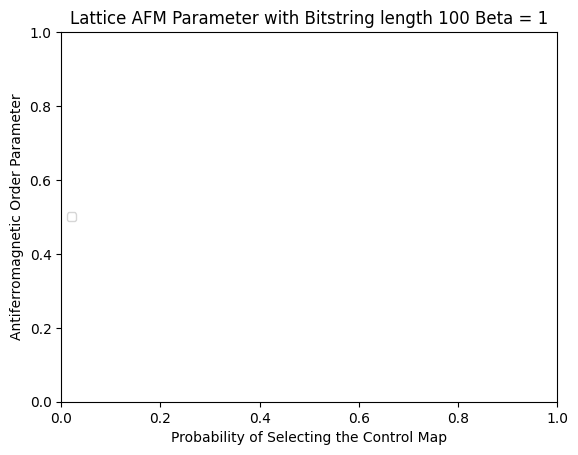

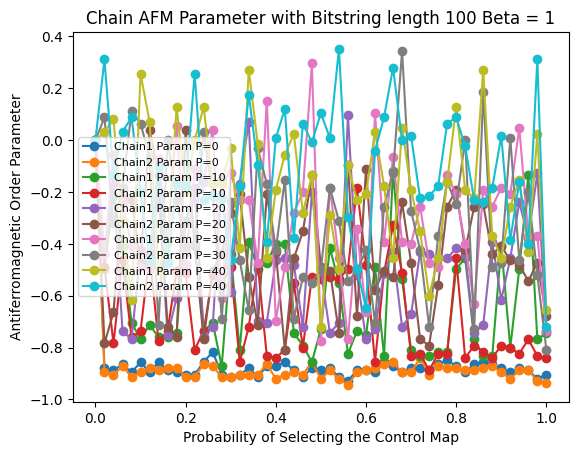

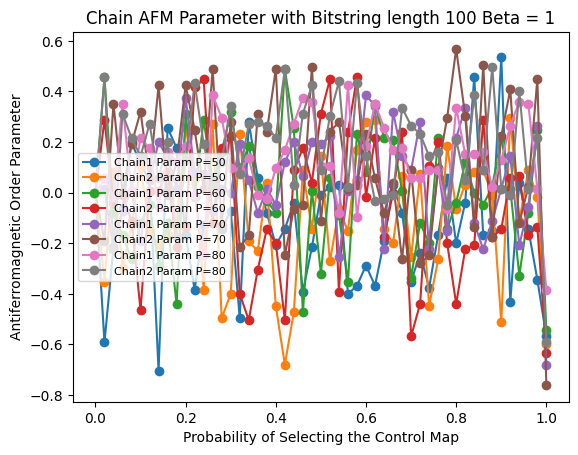

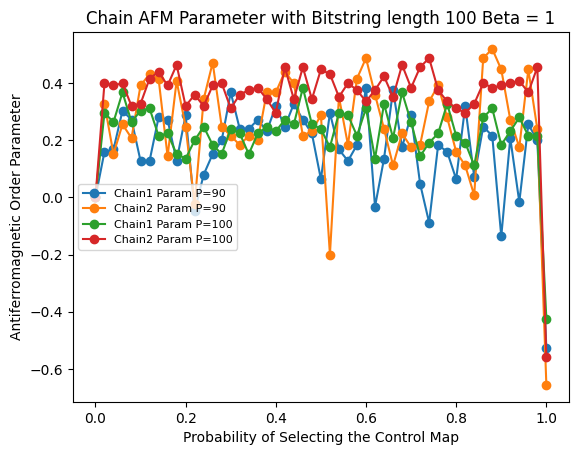

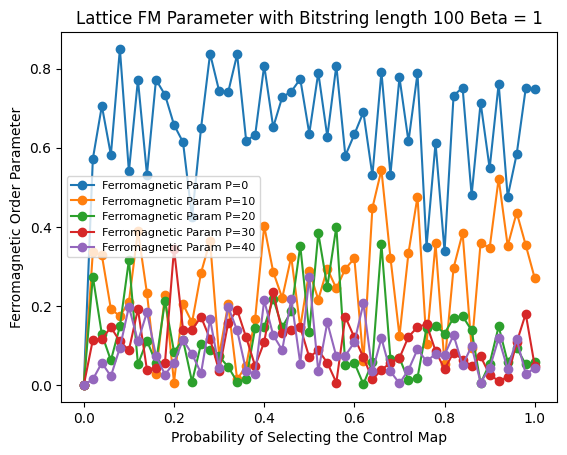

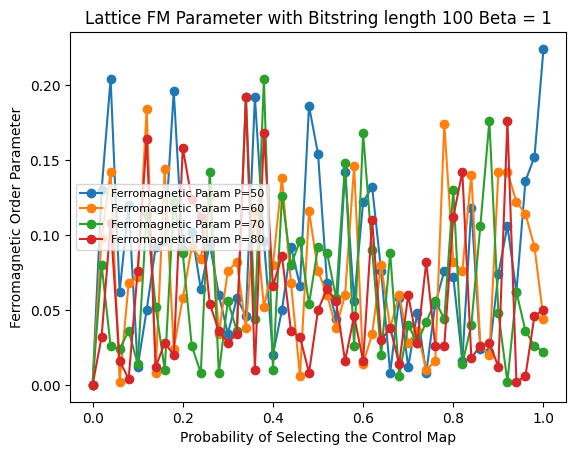

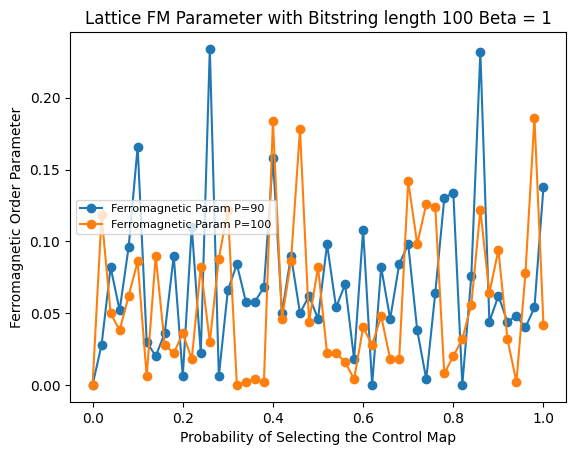

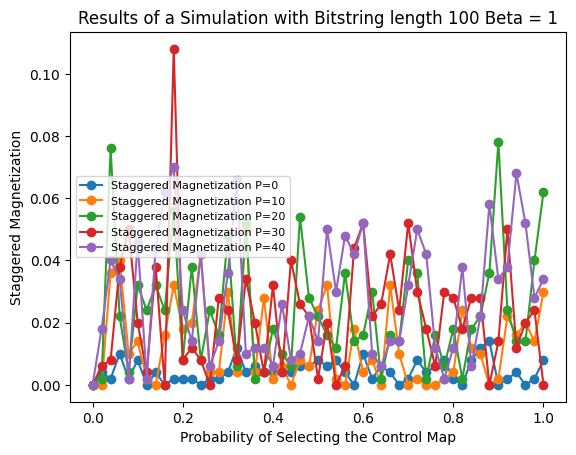

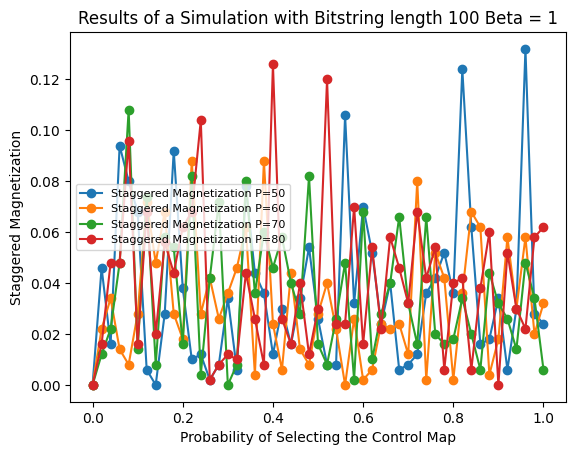

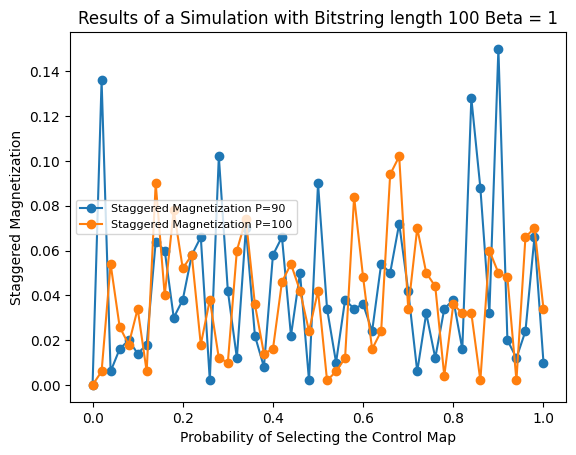

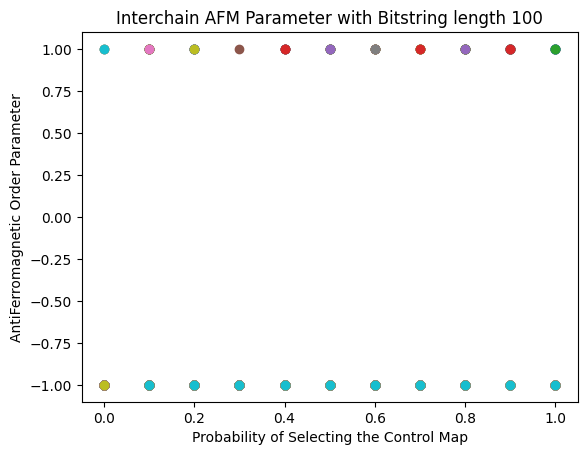

In [81]:
fig, ax = plt.subplots() 
for i in range(num_points):

    ax.plot( np.linspace(0,1,time_size), totalparam[i,:], marker='o', label="Total Param,P=" +str(i*spacing) )
    if i%5 == 0 and i!=0 and (i-1) != num_points: # for readability
        plt.legend(loc='center left', prop={'size':8})
        ax.set_xlabel(r'Probability of Selecting the Control Map')
        ax.set_ylabel(r'Antiferromagnetic Order Parameter')
        ax.set_title(r'Lattice AFM Parameter with Bitstring length '+str(length) +' Beta = ' +str(Beta))
        fig, ax = plt.subplots()

#Below creates two lines crossing at (.5,.5)
#plt.axvline(.5)
#plt.axhline(.5)

plt.legend(loc='center left', prop={'size':8})
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'Antiferromagnetic Order Parameter')
ax.set_title(r'Lattice AFM Parameter with Bitstring length '+str(length) +' Beta = ' +str(Beta))

fig, ax = plt.subplots()
for i in range(num_points):

    ax.plot( np.linspace(0,1,time_size), record1[i,:], marker='o', label= "Chain1 Param P=" +str(i*spacing))
    ax.plot( np.linspace(0,1,time_size), record2[i,:], marker='o', label= "Chain2 Param P=" +str(i*spacing))
    if i%4 == 0 and i!=0 and (i-1) != num_points: # for readability
        plt.legend(loc='center left', prop={'size':8})
        ax.set_xlabel(r'Probability of Selecting the Control Map')
        ax.set_ylabel(r'Antiferromagnetic Order Parameter')
        ax.set_title(r'Chain AFM Parameter with Bitstring length '+str(length) +' Beta = ' +str(Beta))
        fig, ax = plt.subplots()

plt.legend(loc='center left', prop={'size':8})
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'Antiferromagnetic Order Parameter')
ax.set_title(r'Chain AFM Parameter with Bitstring length '+str(length) +' Beta = ' +str(Beta))


fig, ax = plt.subplots()
for i in range(num_points):

    ax.plot( np.linspace(0,1,time_size), np.abs(recordferro[i,:]), marker='o', label= "Ferromagnetic Param P=" +str(i*spacing))
    if i%4 == 0 and i!=0 and (i-1) != num_points: # for readability
        plt.legend(loc='center left', prop={'size':8})
        ax.set_xlabel(r'Probability of Selecting the Control Map')
        ax.set_ylabel(r'Ferromagnetic Order Parameter')
        ax.set_title(r'Lattice FM Parameter with Bitstring length '+str(length) +' Beta = ' +str(Beta))
        fig, ax = plt.subplots()

plt.legend(loc='center left', prop={'size':8})
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'Ferromagnetic Order Parameter')
ax.set_title(r'Lattice FM Parameter with Bitstring length '+str(length) +' Beta = ' +str(Beta))

fig, ax = plt.subplots()
for i in range(num_points):
    ax.plot(np.linspace(0,1, time_size), np.abs(staggeredMagnetization[i,:]), marker='o', label = "Staggered Magnetization P=" +str(i*spacing))
    if i%4 == 0 and i!=0 and (i-1) != num_points: # for readability
        plt.legend(loc='center left', prop={'size':8})
        ax.set_xlabel(r'Probability of Selecting the Control Map')
        ax.set_ylabel(r'Staggered Magnetization')
        ax.set_title(r'Results of a Simulation with Bitstring length '+str(length) +' Beta = ' +str(Beta))
        fig, ax = plt.subplots()

plt.legend(loc='center left', prop={'size':8})
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'Staggered Magnetization')
ax.set_title(r'Results of a Simulation with Bitstring length '+str(length) +' Beta = ' +str(Beta))

fig, ax = plt.subplots()
for p in range(length):
    ax.scatter( np.linspace(0,1,num_points), recordlong[:, p, -1], marker='o', label="Param Row =" + str(p))

ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'AntiFerromagnetic Order Parameter')
ax.set_title(r'Interchain AFM Parameter with Bitstring length '+str(length))

Text(0.5, 1.0, 'Antiferromagnetic Order Parameter for the Lattice $\\beta$=1')

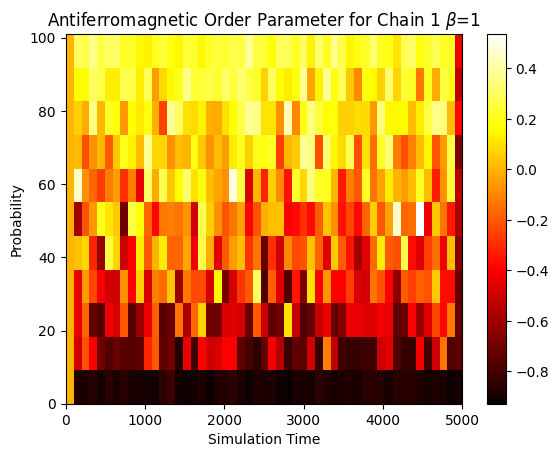

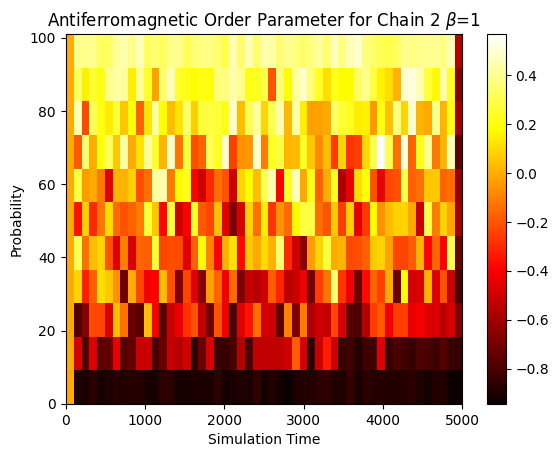

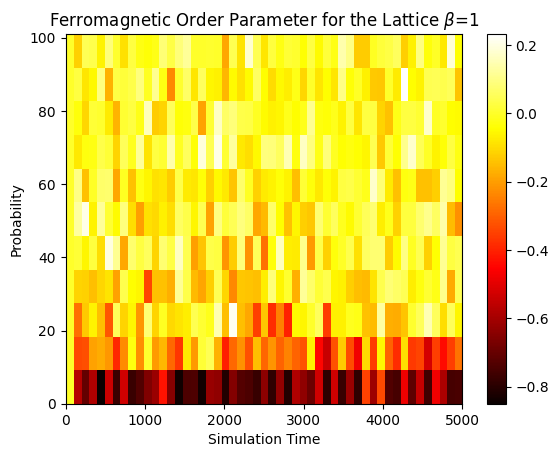

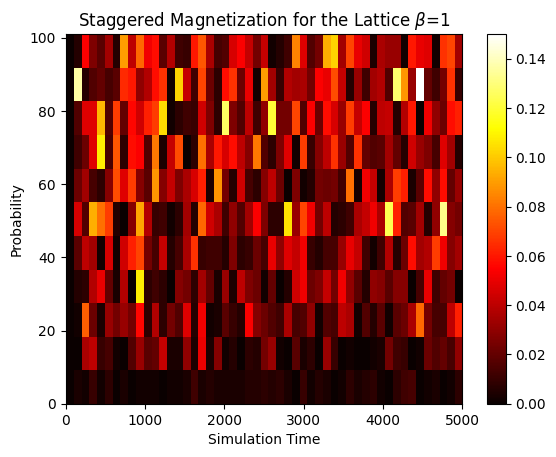

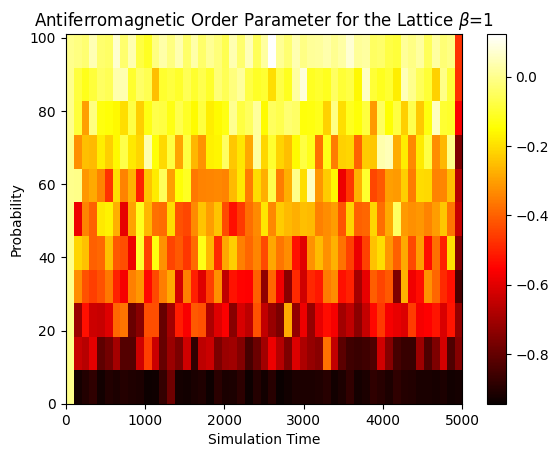

In [73]:

fig,ax = plt.subplots()
rec1=ax.imshow(record1, cmap='hot', interpolation='nearest', origin='lower', extent=[0,(length**2)//2,low_prob,high_prob], vmin=np.min(record1), vmax=np.max(record1), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Probability')
ax.set_title(r'Antiferromagnetic Order Parameter for Chain 1 $\beta$=' + str(Beta))

fig,ax = plt.subplots()
rec1=ax.imshow(record2, cmap='hot', interpolation='nearest', origin='lower', extent=[0,(length**2)//2,low_prob,high_prob],vmin=np.min(record2), vmax=np.max(record2), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Probability')
ax.set_title(r'Antiferromagnetic Order Parameter for Chain 2 $\beta$=' + str(Beta))


fig,ax = plt.subplots()
rec1=ax.imshow(recordferro, cmap='hot', interpolation='nearest', origin='lower', extent=[0,(length**2)//2,low_prob,high_prob],vmin=np.min(recordferro), vmax=np.max(recordferro), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Probability')
ax.set_title(r'Ferromagnetic Order Parameter for the Lattice $\beta$=' + str(Beta))


fig,ax = plt.subplots()
rec1=ax.imshow(staggeredMagnetization, cmap='hot', interpolation='nearest', origin='lower',extent=[0,(length**2)//2,low_prob,high_prob], vmin=np.min(staggeredMagnetization), vmax=np.max(staggeredMagnetization), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Probability')
ax.set_title(r'Staggered Magnetization for the Lattice $\beta$=' + str(Beta))


fig,ax = plt.subplots()
rec1=ax.imshow(totalparam,cmap = 'hot',interpolation='nearest', origin='lower', extent=[0,(length**2)//2,low_prob,high_prob],vmin=np.min(totalparam), vmax=np.max(totalparam), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_xlabel(r'Simulation Time')
ax.set_ylabel(r'Probability')
ax.set_title(r'Antiferromagnetic Order Parameter for the Lattice $\beta$=' + str(Beta))


In [77]:
print(totalparam[:,0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
